<a href="https://colab.research.google.com/github/MAboElFottouh/Predictive-Modelling-Using-Social-Profile-in-Online-P2P-Lending-Market-Project-TCS56EA/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization

In [4]:
data = pd.read_csv("/content/drive/MyDrive/prosperLoanData.csv")

In [5]:
print('\nNumber of rows and columns in the data set: ',data.shape)
#Lets look into top few rows and columns in the dataset
data.head()


Number of rows and columns in the data set:  (113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
data['Term'].unique()

array([36, 60, 12])

In [7]:
data['ProsperRating (Alpha)']

0         NaN
1           A
2         NaN
3           A
4           D
         ... 
113932      C
113933      A
113934      D
113935      C
113936      A
Name: ProsperRating (Alpha), Length: 113937, dtype: object

In [8]:
data.info() #show data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

**dtypes: bool(3), float64(50), int64(11), object(17)**

## **check null values**

In [9]:
data.duplicated().sum() #check duplicated row

0

In [10]:
#split null object and numerical
nan_object = []
nan_float64 = []
for i in range(data.shape[1]):
  if (data.isna().sum()[i] != 0 ): #if have null only
      if (data[data.columns[i]].dtypes == 'object'):
        nan_object.append(data[data.columns[i]].dtypes)
        nan_object.append(data.isna().sum()[i] )
        nan_object.append(data.columns[i])
      elif(data[data.columns[i]].dtypes == 'float64' or data[data.columns[i]].dtypes == 'int64' ):
        nan_float64.append(data[data.columns[i]].dtypes)
        nan_float64.append(data.isna().sum()[i] )
        nan_float64.append(data.columns[i])

In [11]:
#print null values
for i in range(0,len(nan_object)-2,3): # loop 0 to len array - 3 
  print(nan_object[i],'\t',nan_object[i+1],'\t',nan_object[i+2])
for i in range(0,len(nan_float64)-2,3):
  print(nan_float64[i],'\t',nan_float64[i+1],'\t',nan_float64[i+2])

object 	 84984 	 CreditGrade
object 	 58848 	 ClosedDate
object 	 29084 	 ProsperRating (Alpha)
object 	 5515 	 BorrowerState
object 	 3588 	 Occupation
object 	 2255 	 EmploymentStatus
object 	 100596 	 GroupKey
object 	 697 	 FirstRecordedCreditLine
float64 	 25 	 BorrowerAPR
float64 	 29084 	 EstimatedEffectiveYield
float64 	 29084 	 EstimatedLoss
float64 	 29084 	 EstimatedReturn
float64 	 29084 	 ProsperRating (numeric)
float64 	 29084 	 ProsperScore
float64 	 7625 	 EmploymentStatusDuration
float64 	 591 	 CreditScoreRangeLower
float64 	 591 	 CreditScoreRangeUpper
float64 	 7604 	 CurrentCreditLines
float64 	 7604 	 OpenCreditLines
float64 	 697 	 TotalCreditLinespast7years
float64 	 697 	 InquiriesLast6Months
float64 	 1159 	 TotalInquiries
float64 	 697 	 CurrentDelinquencies
float64 	 7622 	 AmountDelinquent
float64 	 990 	 DelinquenciesLast7Years
float64 	 697 	 PublicRecordsLast10Years
float64 	 7604 	 PublicRecordsLast12Months
float64 	 7604 	 RevolvingCreditBalance
float6

1 : What are the most number of borrowers Credit Grade?

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64


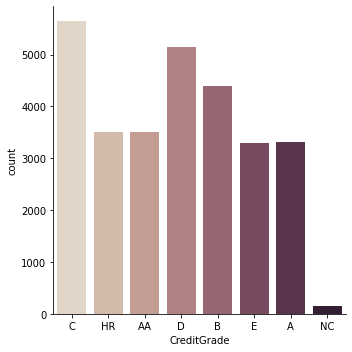

In [12]:
print(data['CreditGrade'].value_counts())
sns.catplot(x="CreditGrade", kind="count", palette="ch:.25", data=data)

2 : Since there are so much low Credit Grade such as C and D , does it lead to a higher amount of deliquency?

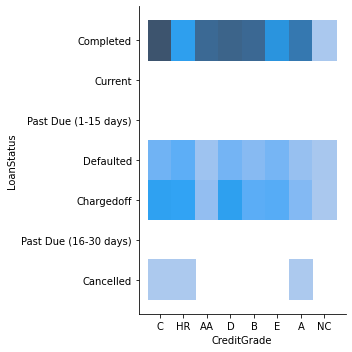

In [13]:
sns.displot(data, x="CreditGrade", y="LoanStatus")

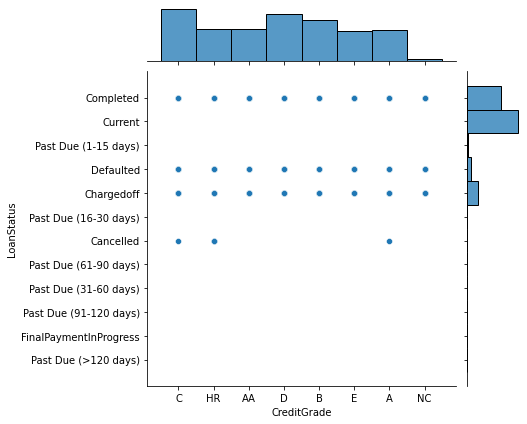

In [14]:
sns.jointplot(data=data, x="CreditGrade", y="LoanStatus")


3 : What is the highest number of BorrowerRate?

In [15]:
print('the highest number of BorrowerRate : ' , data['BorrowerRate'].max() )

the highest number of BorrowerRate :  0.4975


4-Since the highest number of Borrower Rate is between 0.1 and 0.2, does the highest number of Lender Yield is between 0.1 and 0.2?

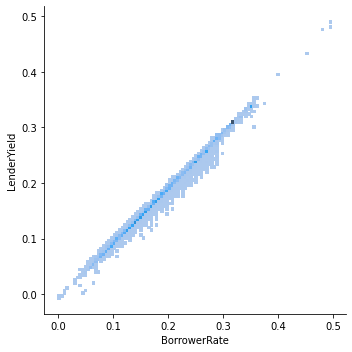

In [16]:
sns.displot(data, x="BorrowerRate", y="LenderYield")

yes Because have linear correlation 

 5 : Is the Credit Grade really accurate? Does higher Credit Grade leads to higher Monthly Loan Payment? As for Higher Credit Grade we mean from Grade AA to B

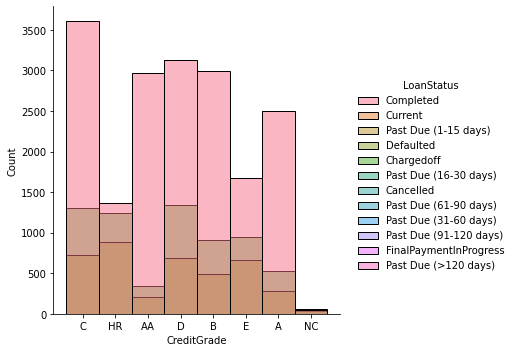

In [17]:
sns.displot(data, x="CreditGrade", hue="LoanStatus")

In [18]:
data[['CreditGrade','LoanStatus']].value_counts()

CreditGrade  LoanStatus
C            Completed     3609
D            Completed     3126
B            Completed     2987
AA           Completed     2969
A            Completed     2505
E            Completed     1678
HR           Completed     1372
D            Chargedoff    1343
C            Chargedoff    1310
HR           Chargedoff    1242
E            Chargedoff     946
B            Chargedoff     909
HR           Defaulted      891
C            Defaulted      729
D            Defaulted      684
E            Defaulted      665
A            Chargedoff     526
B            Defaulted      493
AA           Chargedoff     339
A            Defaulted      283
AA           Defaulted      201
NC           Defaulted       64
             Completed       42
             Chargedoff      35
HR           Cancelled        3
C            Cancelled        1
A            Cancelled        1
dtype: int64

In [19]:
dataAA = data[data['CreditGrade']== 'AA']
print('All AA = ',dataAA.shape[0])
dataAA['LoanStatus'].value_counts()

All AA =  3509


Completed     2969
Chargedoff     339
Defaulted      201
Name: LoanStatus, dtype: int64

In [20]:
print('Completed status in AA = {} % '.format(2969 / 3509 * 100))

Completed status in AA = 84.61100028498147 % 


In [21]:
dataB = data[data['CreditGrade']== 'B']
print('All B = ',dataB.shape[0])
dataB['LoanStatus'].value_counts()

All B =  4389


Completed     2987
Chargedoff     909
Defaulted      493
Name: LoanStatus, dtype: int64

In [22]:
print('Completed status in B = {} % '.format(2987 / 4398 * 100))

Completed status in B = 67.91723510686676 % 


The Credit Grade did not decrease as the percentage of Completed decreased

In [23]:
dataAB = data[(data['CreditGrade'].eq('AA') | data['CreditGrade'].eq('B') |  data['CreditGrade'].eq('A'))]
print('All B = ',dataAB.shape[0])
dataAB['LoanStatus'].value_counts()

All B =  11213


Completed     8461
Chargedoff    1774
Defaulted      977
Cancelled        1
Name: LoanStatus, dtype: int64

In [24]:
print('Completed status AA to B = {} % '.format(8461 / 11213 * 100))

Completed status AA to B = 75.4570587710693 % 


### replace null 

In [25]:
# TotalProsperLoans , TotalProsperPaymentsBilled , OnTimeProsperPayments , ProsperPaymentsLessThanOneMonthLate ,
#ProsperPaymentsOneMonthPlusLate , ProsperPrincipalBorrowed , ProsperPrincipalOutstanding , ScorexChangeAtTimeOfListing , 
#LoanFirstDefaultedCycleNumber 

# all this columns value will be null if the borrower had no prior loans.
# replace All null to 0

value_will_be_null = ['TotalProsperLoans' , 'TotalProsperPaymentsBilled' , 'OnTimeProsperPayments' , 'ProsperPaymentsLessThanOneMonthLate' ,
'ProsperPaymentsOneMonthPlusLate' , 'ProsperPrincipalBorrowed' , 'ProsperPrincipalOutstanding' , 'ScorexChangeAtTimeOfListing' , 
'LoanFirstDefaultedCycleNumber']

for i in value_will_be_null:
  data[i].replace(np.nan,0,inplace=True)
  data[i].astype('float64')


In [26]:
print(data['CreditGrade'].unique())
print(data['ProsperRating (Alpha)'].unique())

['C' nan 'HR' 'AA' 'D' 'B' 'E' 'A' 'NC']
[nan 'A' 'D' 'B' 'E' 'C' 'AA' 'HR']


In [27]:
data[data['CreditGrade']=='NC']

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
794,00EF338150577356881AD6B,97950,2007-02-11 13:40:55.490000000,NC,36,Completed,2010-02-22 00:00:00,0.29776,0.2900,0.2850,...,-34.97,0.0000,0.00,0.00,0.00,1.0,0,0,0.0,38
912,7A41337257909407897EB67,61512,2006-11-14 08:23:08.430000000,NC,36,Defaulted,2007-11-18 00:00:00,0.27276,0.2600,0.2450,...,-4.10,0.0000,1290.20,1290.21,0.00,1.0,0,0,0.0,11
1685,403F33816853903261A0142,94290,2007-02-06 15:50:46.723000000,NC,36,Chargedoff,2008-04-20 00:00:00,0.18065,0.1625,0.1575,...,-1.11,-19.1100,846.17,846.19,0.00,1.0,0,0,0.0,64
4290,4B4C33658186085093BB6B4,7055,2006-04-23 14:19:41.030000000,NC,36,Chargedoff,2007-12-25 00:00:00,0.24502,0.2375,0.2325,...,-21.31,0.0000,2671.35,2671.35,0.00,1.0,0,0,0.0,24
4371,985433663733409747DA533,31236,2006-08-14 11:45:59.710000000,NC,36,Defaulted,2007-09-26 00:00:00,0.24505,0.2325,0.2150,...,-4.67,0.0000,1261.08,1261.07,0.00,1.0,0,0,0.0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109522,2575337371414583913B6EA,60886,2006-11-13 06:36:16.067000000,NC,36,Chargedoff,2008-01-29 00:00:00,0.21543,0.2000,0.1950,...,-3.80,-22.2039,995.44,875.42,259.99,1.0,0,0,0.0,4
109855,FE063379142663462D83FD4,85920,2007-01-17 13:07:35.540000000,NC,36,Completed,2010-02-08 00:00:00,0.22643,0.2190,0.1840,...,-25.01,-39.8900,0.00,0.00,0.00,1.0,0,0,0.0,30
110290,7AB333803121117292D39C0,97521,2007-02-10 21:22:12.553000000,NC,36,Chargedoff,2009-08-22 00:00:00,0.17752,0.1594,0.1244,...,-7.41,0.0000,381.29,381.30,0.00,1.0,0,0,0.0,20
111624,B4F6337744905877323E37A,82404,2007-01-07 20:33:39.027000000,NC,36,Defaulted,2007-07-22 00:00:00,0.29776,0.2900,0.2550,...,0.00,0.0000,3002.00,2921.95,0.00,1.0,0,0,0.0,27


In [28]:
j = 0
for i in range(data.shape[1]):
  if (data.isna().sum()[i] != 0 ):
    print(j,'\t',data[data.columns[i]].dtypes , '\t' ,data.isna().sum()[i] , '\t', data.columns[i])
    j+=1



0 	 object 	 84984 	 CreditGrade
1 	 object 	 58848 	 ClosedDate
2 	 float64 	 25 	 BorrowerAPR
3 	 float64 	 29084 	 EstimatedEffectiveYield
4 	 float64 	 29084 	 EstimatedLoss
5 	 float64 	 29084 	 EstimatedReturn
6 	 float64 	 29084 	 ProsperRating (numeric)
7 	 object 	 29084 	 ProsperRating (Alpha)
8 	 float64 	 29084 	 ProsperScore
9 	 object 	 5515 	 BorrowerState
10 	 object 	 3588 	 Occupation
11 	 object 	 2255 	 EmploymentStatus
12 	 float64 	 7625 	 EmploymentStatusDuration
13 	 object 	 100596 	 GroupKey
14 	 float64 	 591 	 CreditScoreRangeLower
15 	 float64 	 591 	 CreditScoreRangeUpper
16 	 object 	 697 	 FirstRecordedCreditLine
17 	 float64 	 7604 	 CurrentCreditLines
18 	 float64 	 7604 	 OpenCreditLines
19 	 float64 	 697 	 TotalCreditLinespast7years
20 	 float64 	 697 	 InquiriesLast6Months
21 	 float64 	 1159 	 TotalInquiries
22 	 float64 	 697 	 CurrentDelinquencies
23 	 float64 	 7622 	 AmountDelinquent
24 	 float64 	 990 	 DelinquenciesLast7Years
25 	 float64 	 

In [29]:
data.drop('ProsperRating (numeric)',axis=1, inplace= True) # ProsperRating (numeric) & ProsperRating (Alpha) same column
data.drop('ListingKey',axis=1, inplace= True) #unique key like id 


In [30]:
data.drop('GroupKey',axis=1, inplace= True)  # have 100,000 null 

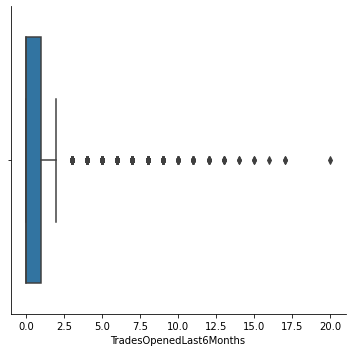

In [31]:
sns.catplot(x="TradesOpenedLast6Months", kind="box", data=data)

In [32]:
data['TradesOpenedLast6Months'].replace(np.nan,float(data['TradesOpenedLast6Months'].mode()),inplace=True) 
data['TradesOpenedLast6Months'].astype('float64') #replace null with mode Because column have outlier

0         0.0
1         2.0
2         0.0
3         0.0
4         2.0
         ... 
113932    3.0
113933    0.0
113934    0.0
113935    1.0
113936    0.0
Name: TradesOpenedLast6Months, Length: 113937, dtype: float64

<Figure size 720x360 with 0 Axes>

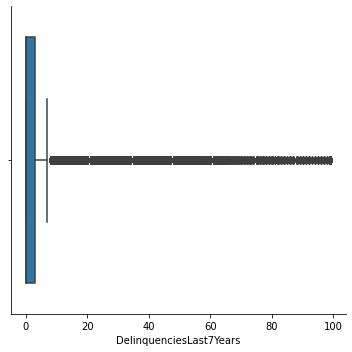

<Figure size 720x360 with 0 Axes>

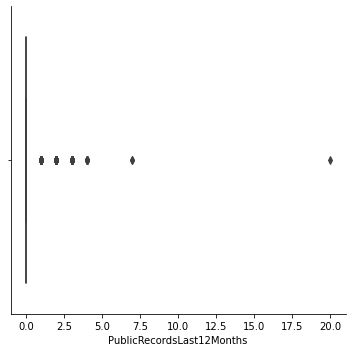

<Figure size 720x360 with 0 Axes>

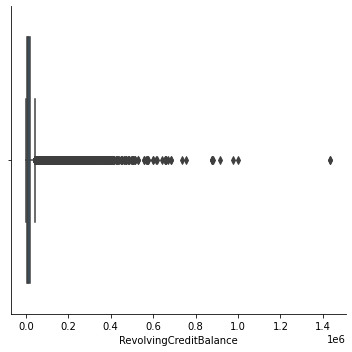

<Figure size 720x360 with 0 Axes>

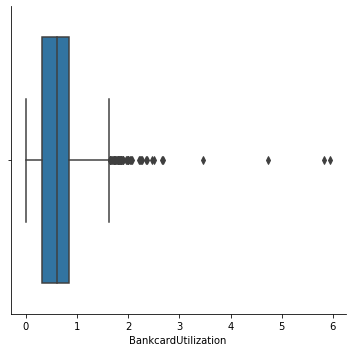

<Figure size 720x360 with 0 Axes>

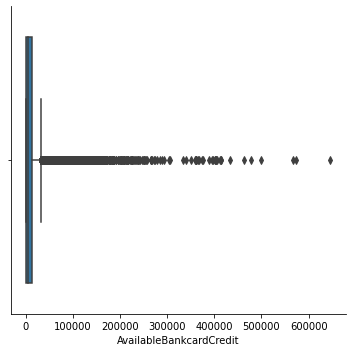

<Figure size 720x360 with 0 Axes>

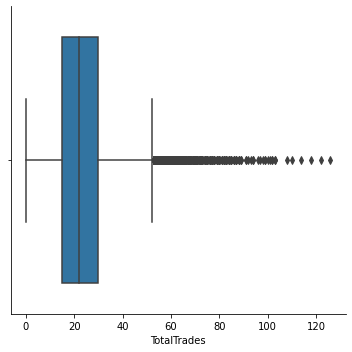

<Figure size 720x360 with 0 Axes>

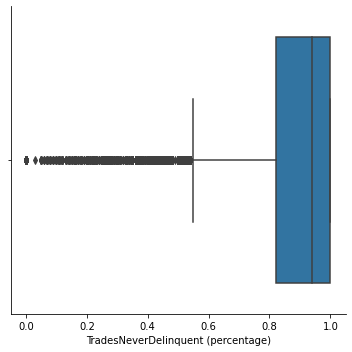

<Figure size 720x360 with 0 Axes>

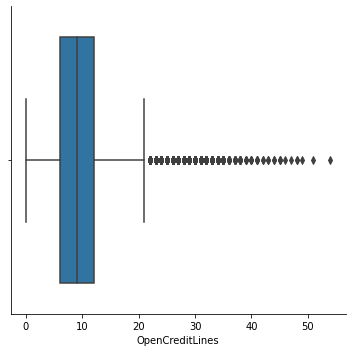

<Figure size 720x360 with 0 Axes>

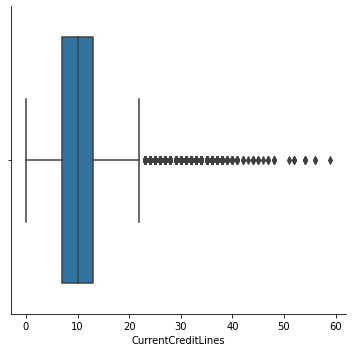

In [33]:
arr = ['DelinquenciesLast7Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit',
       'TotalTrades','TradesNeverDelinquent (percentage)','OpenCreditLines','CurrentCreditLines']
 # Visualization all columns
 # to show if have outlier 
for columns in arr:
    plt.figure(figsize=(10,5))
    sns.catplot(x=columns, kind="box", data=data)
    plt.show()
    data[columns].replace(np.nan,float(data[columns].mode()),inplace=True) 
    data[columns].astype('float64') #replace null with mode Because column have outlier

In [34]:
#columns unique  
for i in data.columns :
  if data[i].nunique() > 112000:
    print(data[i].nunique() , '\t' , i)

113066 	 ListingNumber
113064 	 ListingCreationDate
112992 	 DateCreditPulled
113066 	 LoanKey
113066 	 LoanNumber


In [35]:
#drop this columns 
unique_value = ['LoanKey', 'ListingNumber' ,'ListingCreationDate','LoanNumber','DateCreditPulled' ]
for i in unique_value:
  data.drop(i,axis=1, inplace= True) 

In [36]:
data.shape

(113937, 73)

In [37]:
data['CreditGrade'].replace('NC',np.nan,inplace=True) 

In [38]:
data['Grade'] = np.nan

In [56]:
if (data['ProsperRating (Alpha)'][1] != np.nan):
  print('ssssss')

ssssss


In [65]:
for i in range(data.shape[0]):
  if data['ProsperRating (Alpha)'].isna()[i]:    
   data['Grade'][i]  = data['ProsperRating (Alpha)'][i]
  elif data['CreditGrade'].isna()[i] : 
    data['Grade'][i]  = data['CreditGrade'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [68]:
data['Grade'].isna().sum()

113937

In [69]:
data[['Grade','ProsperRating (Alpha)']]

,Grade,ProsperRating (Alpha)
0,NaN,NaN
1,NaN,A
2,NaN,NaN
3,NaN,A
4,NaN,D
...,...,...
113932,NaN,C
113933,NaN,A
113934,NaN,D
113935,NaN,C


In [63]:
data['ProsperRating (Alpha)'].isna()[1]

False